In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
wd = '/home/brian/Documents/data/Classifier'
file = 'p21_classifier_ns_metrics.tsv'

path = os.path.join(wd, file)

data = pd.read_csv(path,sep='\t', index_col='exp_ic')

In [14]:
data.head()

,age,artifact,freq.avgsnr,freq.integrate,freq.maxsnr,freq.maxsnr.freq,freq.range.high,freq.range.low,freq.rangesz,length,...,spatial.min,spatial.n.domains,spatial.std,temporal.autocorr,temporal.max,temporal.min,temporal.n.freq,temporal.std,threshold.area,threshold.perc
exp_ic,,,,,,,,,,,,,,,,,,,,,
170804_02-0000,21.0,1.0,1.230580,0.112841,1.377858,4.0,2.500000,0.963882,1.536118,12.0,...,-0.004451,4.0,0.000764,0.971156,74.819717,-13.771223,3.0,8.508549,13190.0,0.799976
170804_02-0001,21.0,1.0,1.170509,0.038031,1.311391,4.0,2.726269,1.250000,1.476269,10.0,...,-0.003283,8.0,0.000764,0.981528,48.029102,-13.635504,3.0,7.621354,13455.0,0.681059
170804_02-0002,21.0,1.0,1.113086,0.035343,1.175733,3.0,2.292510,0.743254,1.549256,14.0,...,-0.004329,8.0,0.000764,0.987177,45.497751,-10.480838,2.0,6.864244,9189.0,0.939667
170804_02-0003,21.0,0.0,1.149652,0.057386,1.216564,3.0,2.726269,1.621049,1.105220,7.0,...,-0.002758,1.0,0.000764,0.948855,32.889215,-16.242683,2.0,6.703320,21019.0,1.000000
170804_02-0004,21.0,0.0,1.106510,0.044102,1.172085,4.0,2.726269,1.486509,1.239760,8.0,...,-0.002641,1.0,0.000764,0.953928,32.982635,-13.964150,2.0,6.567101,21455.0,1.000000


In [15]:
len(data)

2027

In [21]:
# print(data.index)
print(data.columns)

Index(['age', 'artifact', 'freq.avgsnr', 'freq.integrate', 'freq.maxsnr',
       'freq.maxsnr.freq', 'freq.range.high', 'freq.range.low', 'freq.rangesz',
       'length', 'mass.perc', 'mass.region', 'mass.total', 'region.centroid.0',
       'region.centroid.1', 'region.eccentricity', 'region.extent',
       'region.majaxis', 'region.majmin.ratio', 'region.minaxis',
       'region.orient', 'signal', 'spatial.COMall.x', 'spatial.COMall.y',
       'spatial.COMdom.x', 'spatial.COMdom.y', 'spatial.avg', 'spatial.max',
       'spatial.min', 'spatial.n.domains', 'spatial.std', 'temporal.autocorr',
       'temporal.max', 'temporal.min', 'temporal.n.freq', 'temporal.std',
       'threshold.area', 'threshold.perc'],
      dtype='object')


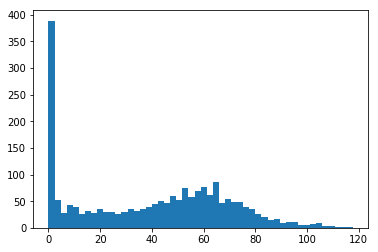

In [23]:
plt.hist(data['mass.region'], bins = 50)
plt.show()

age


/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


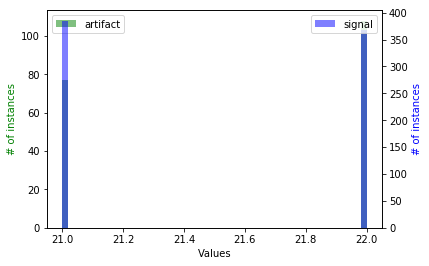

artifact


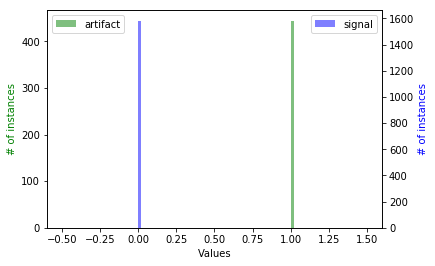

freq.avgsnr


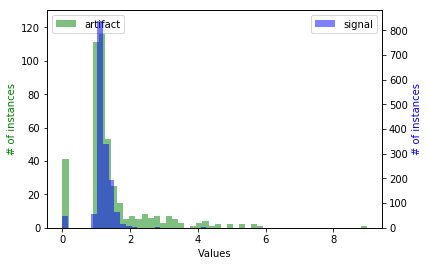

freq.integrate


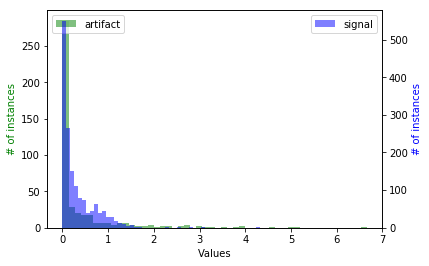

freq.maxsnr


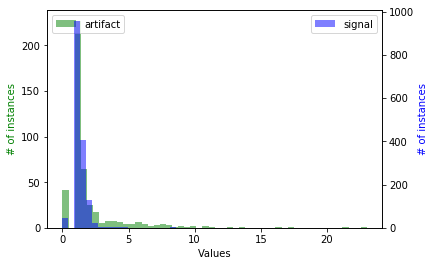

freq.maxsnr.freq


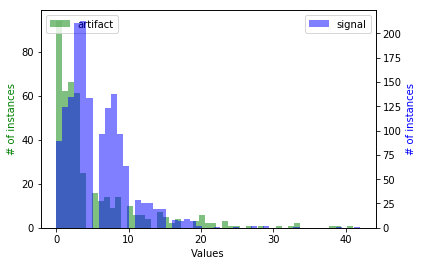

freq.range.high


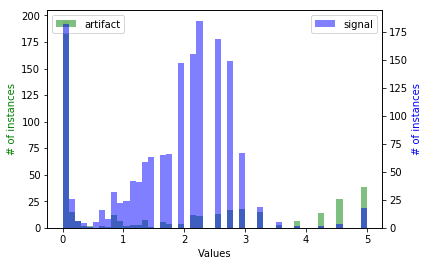

freq.range.low


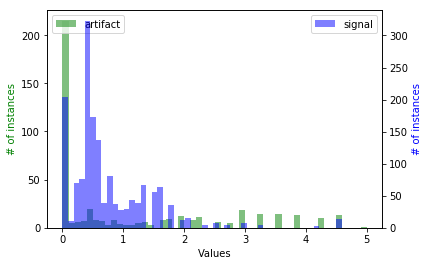

freq.rangesz


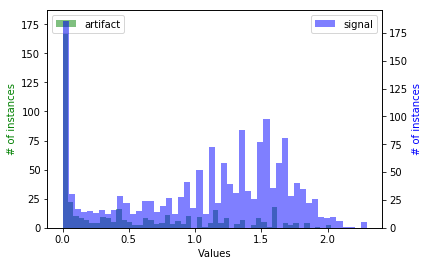

length


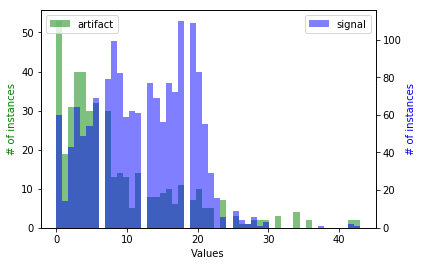

mass.perc


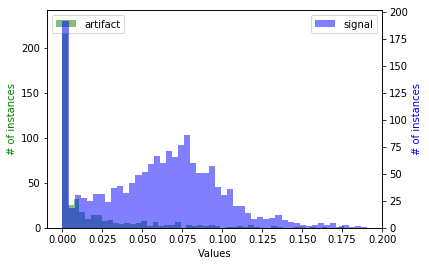

mass.region


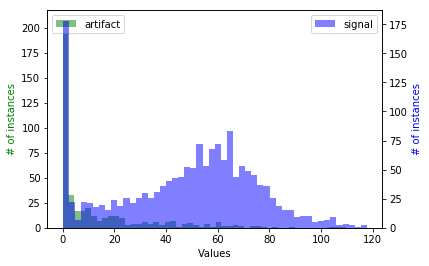

mass.total


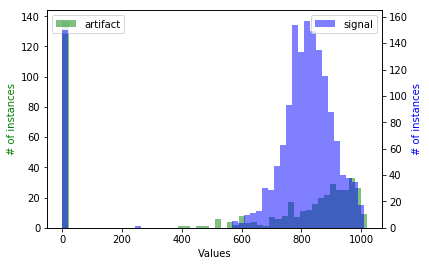

region.centroid.0


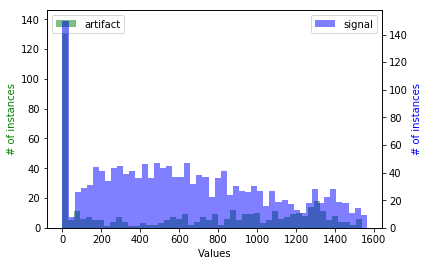

region.centroid.1


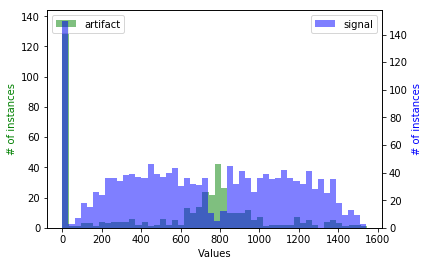

region.eccentricity


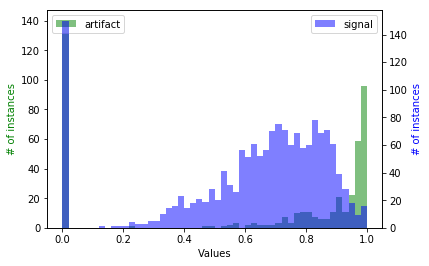

region.extent


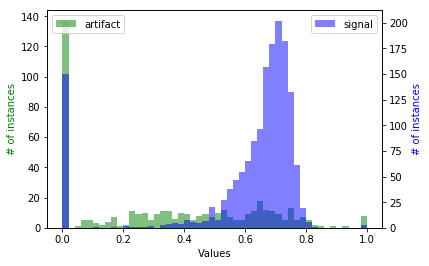

region.majaxis


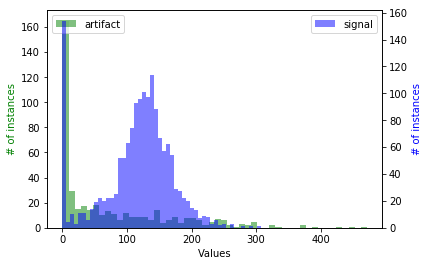

region.majmin.ratio


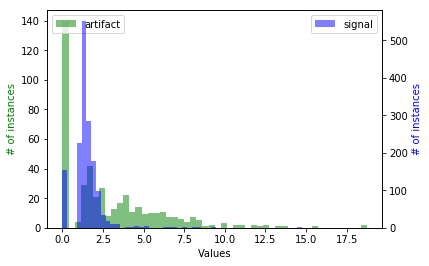

region.minaxis


KeyboardInterrupt: 

In [35]:
col_names = ['freq.maxsnr.freq', 'freq.range.high', 'freq.range.low']

artifact_index = data.loc[data['artifact'] == 1].index
signal_index = data.loc[data['signal'] == 1].index

for col in data.columns:
    print(col)

    fig , ax1 = plt.subplots()
    ax1.hist(data.loc[artifact_index, col], bins = 50, alpha = 0.5, label ='artifact', color = 'g')
    ax1.grid(False)         
    ax1.set_xlabel('Values')
    ax1.set_ylabel('# of instances', color = 'green')
    
    ax2 = ax1.twinx()
    ax2.hist(data.loc[signal_index, col], bins = 50, alpha = 0.5, label ='signal', color = 'b')
    ax2.set_ylabel('# of instances', color = 'blue')
    ax2.grid(False)
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()


In [ ]:
# homework
# Use sns.pairplot and plot values based on their classification, 
# overlapping histograms/scatter plot